# Data Dictionary

## Variable:	Definition	Key
survival:	Survival	0 = No, 1 = Yes

pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex:	Sex	

Age:	Age in years	

sibsp:	# of siblings / spouses aboard the Titanic	

parch:	# of parents / children aboard the Titanic	

ticket:	Ticket number	

fare:	Passenger fare	

cabin:	Cabin number	

embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Prelimenary Stuff


In [18]:
# Import some libraries we'll use, and set matplotlib to be inline
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [19]:
# Now load in the data into a 'dataframe'
df = pd.read_csv('data/train.csv')

In [20]:
# In Jupyter, we can simply print a dataframe just by putting it as the last block of code in a cell
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From quickly browsing our dataset, we can see that there are a lot of NaN (null) values for the Cabin and that the values for ticket are pretty inconsistent, so we can drop them very easily with pandas.

# Pre-Processing

In [21]:
# Drop specific features from our dataframe
df = df.drop(['Ticket','Cabin', 'PassengerId'], axis=1)

# Remove NaN values
df = df.dropna()

In [22]:
# Now lets transform the sex field to be a binary gender field called male
df['Male'] = np.where(df['Sex']=='male', 1, 0) 

# Now lets drop the sex field altogether
# We can drop the name, since it is irrelevant
df = df.drop(['Sex', 'Name'], axis=1)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
6,0,1,54.0,0,0,51.8625,S,1
7,0,3,2.0,3,1,21.0750,S,1
8,1,3,27.0,0,2,11.1333,S,0
9,1,2,14.0,1,0,30.0708,C,0
10,1,3,4.0,1,1,16.7000,S,0


In [23]:
# Let's turn the Embarked column into one hot encoding
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)

# Now drop the original embarked
df = df.drop(['Embarked'], axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,0,1
7,0,3,2.0,3,1,21.0750,1,0,0,1
8,1,3,27.0,0,2,11.1333,0,0,0,1
9,1,2,14.0,1,0,30.0708,0,1,0,0
10,1,3,4.0,1,1,16.7000,0,0,0,1


# Analysis

In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,C,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.636236,0.182584,0.039326,0.778090
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120830048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121205d30>]], dtype=object)

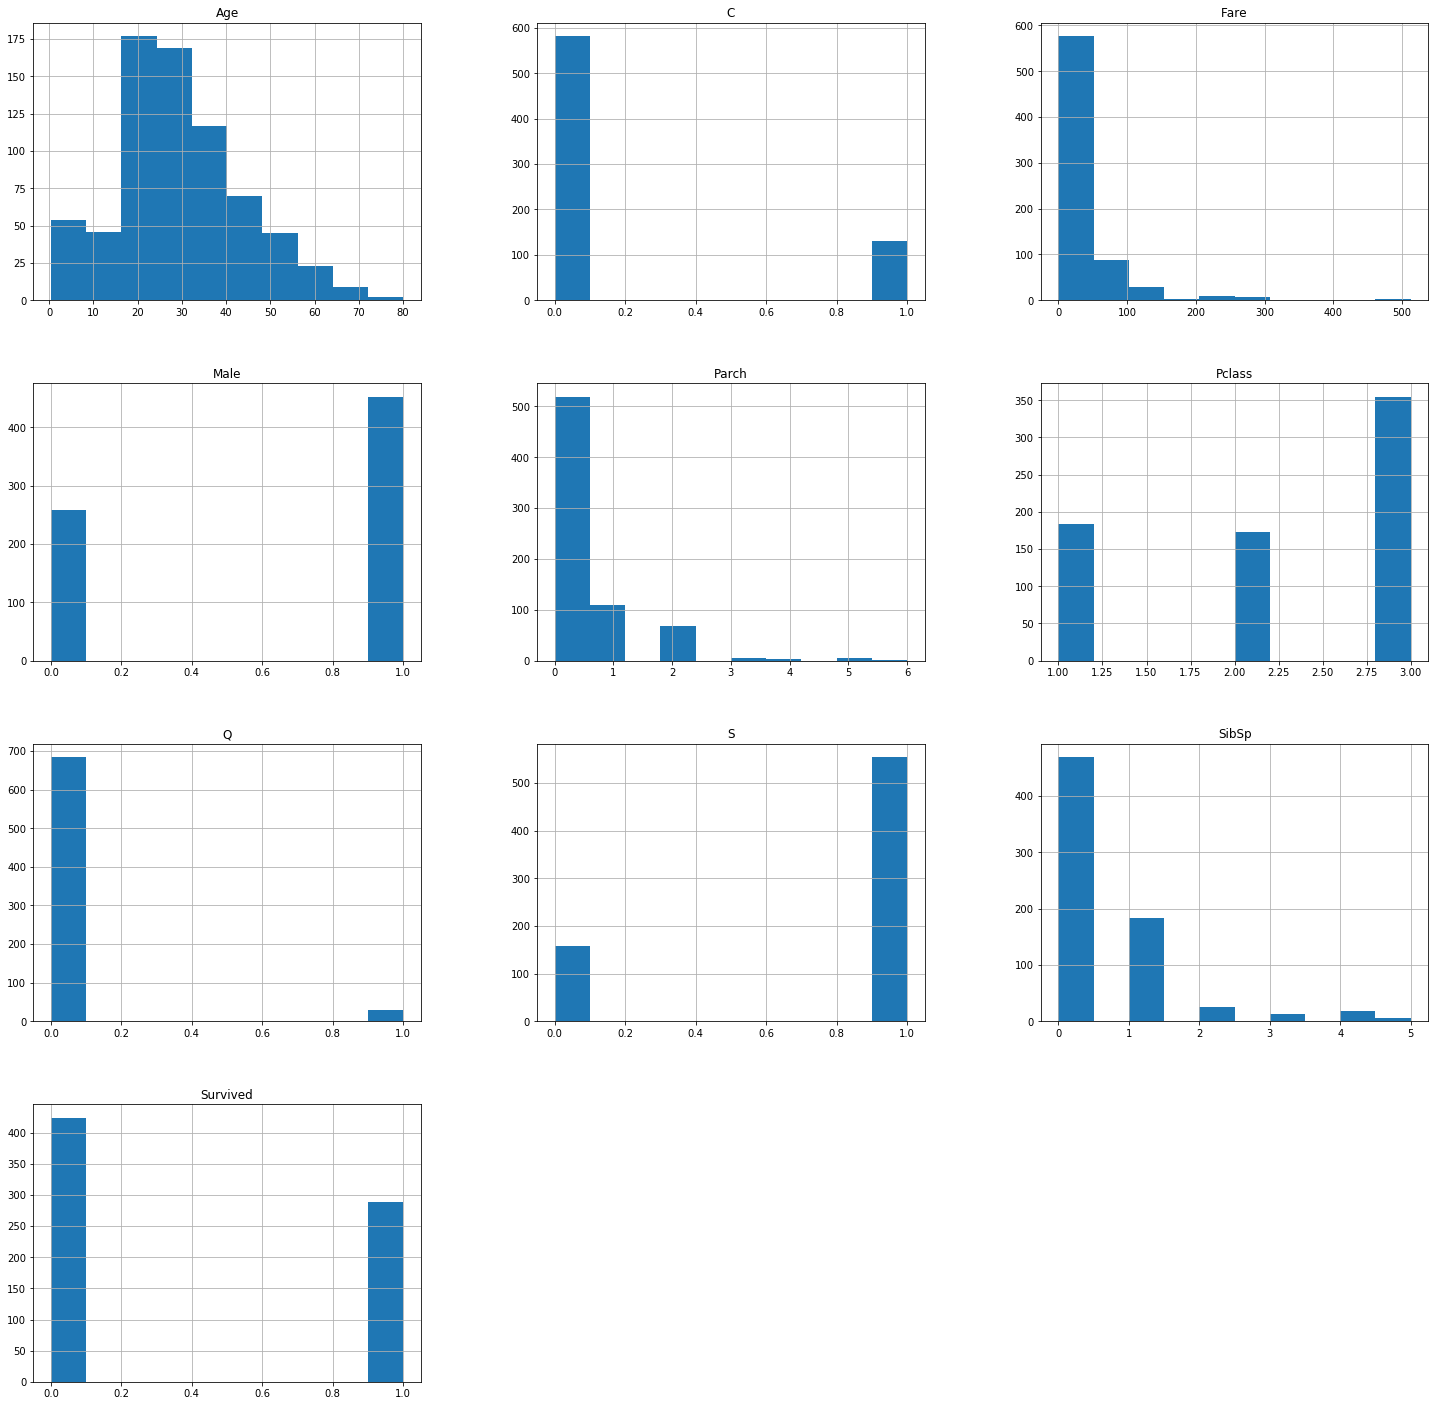

In [26]:
df.hist(figsize=(25,25))

# Training

Now it's time to split the data. Lucky for us, sklearn has a great built-in split function. We need to make sure to set the random state so the split of data is the same everytime!

In [27]:
from sklearn.model_selection import train_test_split

# Our y will be the survived column so we'll add it then drop it from our X set
y = df['Survived']
X = df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Linear Regression
The first algorithm we'll tryout is called Linear Regression. It serves as great baseline.

In [28]:
# First we'll tryout the basic LR algorithm
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()

# First we'll train the model on our data.
lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)

# LR predicts confidences, so we have to round it
preds = np.rint(preds)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.77622377622377625

# Random Forests
A powerful, simple approach!

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' , n_estimators=40, oob_score = True, random_state=42) 

rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.78321678321678323

In [31]:
# You can also view the weighted importances of the columns based on a classifier
importances = rfc.feature_importances_

for i in range(len(X_train.columns)):
    print(X_train.columns[i], '\t', importances[i])
    

Pclass 	 0.101347668844
Age 	 0.27688389468
SibSp 	 0.0475893410372
Parch 	 0.0301516840237
Fare 	 0.256226615217
Male 	 0.259663618654
C 	 0.0147858496252
Q 	 0.00229185836473
S 	 0.0110594695543


From this, we can see that the 3 most important features are the passengers gender, fare, and age

### Hyperparameter Tuning
Now, instead of just using th default parameters, we'll setup a gridsearch of multiple combinations to train on, then view the top ones.

In [45]:
from sklearn.grid_search import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' , n_estimators=40, oob_score = True, random_state=42) 

param_grid = {
    'n_estimators': [20, 25, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 25, 30, 40], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [46]:
print(CV_rfc.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


In [47]:
accuracy_score(CV_rfc.predict(X_test), y_test)

0.79720279720279719